In [7]:
import numpy as np
import numba as nb
from numba import njit, prange
import time

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import importlib

# --- Core Synthetic data ---
import src.core_SynData
importlib.reload(src.core_SynData)
from src.core_SynData import *

In [2]:
# --- Simulation Parameters ---
N = 50000000
grid  = 1001
r     = 0.01*60                 # 1/HR
tau   = 0.0 
dt    = 1/60                    # 1/HR
beta  = 0.6                     # min/MW
Pmax  = 160
alpha = r*Pmax                  # MW/HR

a = alpha * dt                  # MW
a_tilde = beta * a
print(f"Pmax: {Pmax}")
print(f"alpha value: {alpha} \na value: {a} \na_tilde value: {a_tilde}")

Pmax: 160
alpha value: 96.0 
a value: 1.6 
a_tilde value: 0.96


### Simple Laplace 

- Write the Laplace distribution for the simple Laplace case

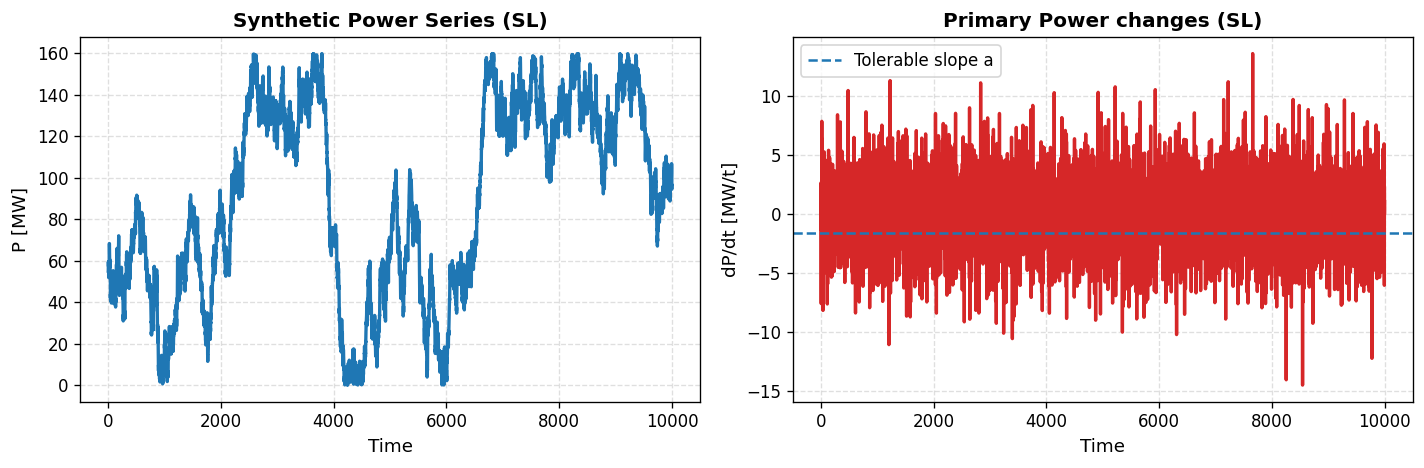

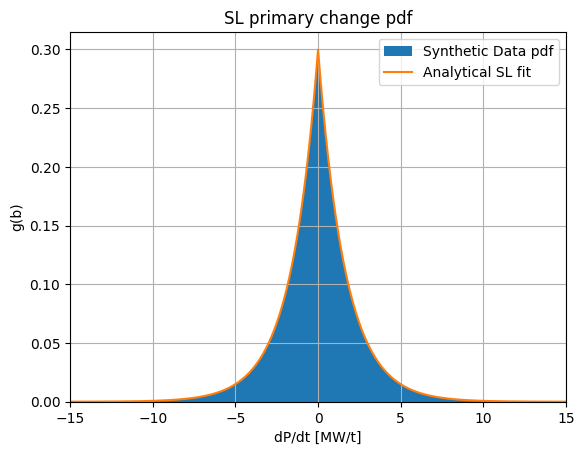

In [8]:
# --- SIMPLE LAPLACE TIME SERIES ---
rng = np.random.default_rng(7)
seed = rng.random(N)
Y_SL, P_SL = simulate_Y_P_SL(N, Pmax, 55, beta, seed)


c = 10000
fig, axes = plt.subplots(1, 2, figsize=(12, 4), dpi=120)
ax = axes[0]

ax.plot(P_SL[:c], color="tab:blue", lw=2)
ax.set_title("Synthetic Power Series (SL)", fontsize=12, fontweight="bold")
ax.set_xlabel("Time", fontsize=11)
ax.set_ylabel("P [MW]", fontsize=11)

ax.grid(True, ls="--", alpha=0.4)
ax.tick_params(labelsize=10)
ax = axes[1]

ax.plot(Y_SL[:c], color="tab:red", lw=2)
ax.axhline(y=-a, linestyle="--", label="Tolerable slope a")
ax.set_title("Primary Power changes (SL)", fontsize=12, fontweight="bold")
ax.set_xlabel("Time", fontsize=11)
ax.set_ylabel("dP/dt [MW/t]", fontsize=11)

ax.grid(True, ls="--", alpha=0.4)
ax.tick_params(labelsize=10)
ax.legend()

# --- Ajustes finales ---
plt.tight_layout()
plt.show()



# --- Simple Laplace analytical pdf ---
y_grid = np.linspace(-15, 15, 10000)
fY_SL = 0.5 * beta * np.exp(-beta * np.abs(y_grid))

plt.figure()
plt.hist(Y_SL, bins=1000, density=True, label="Synthetic Data pdf")
plt.plot(y_grid, fY_SL, label="Analytical SL fit")
plt.title("SL primary change pdf")
plt.xlabel("dP/dt [MW/t]")
plt.ylabel("g(b)")
plt.xlim([-15, 15])
plt.legend()
plt.grid(True)
plt.show()

### Equivalent Generalized Laplace

- Write the distribution and the equivalent parameters

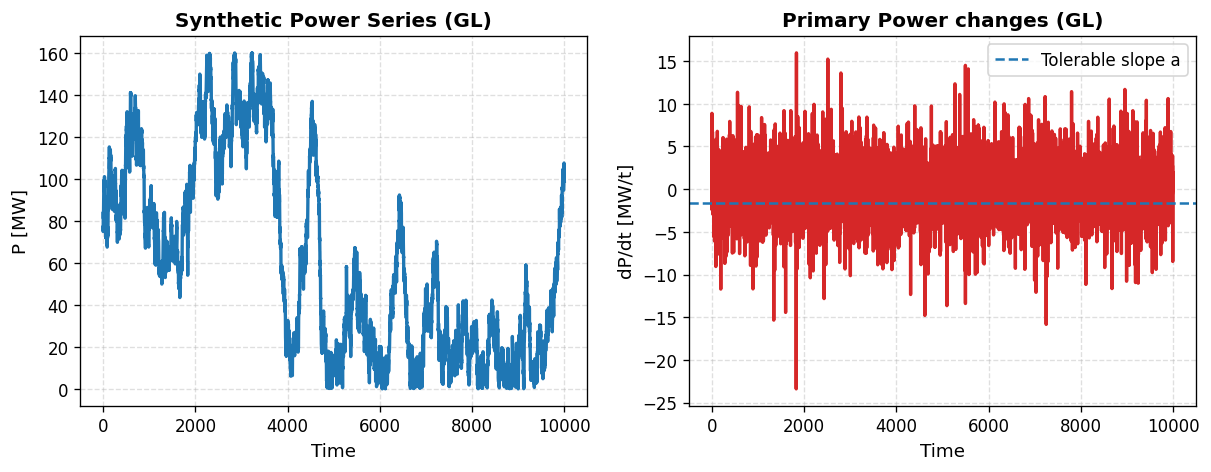

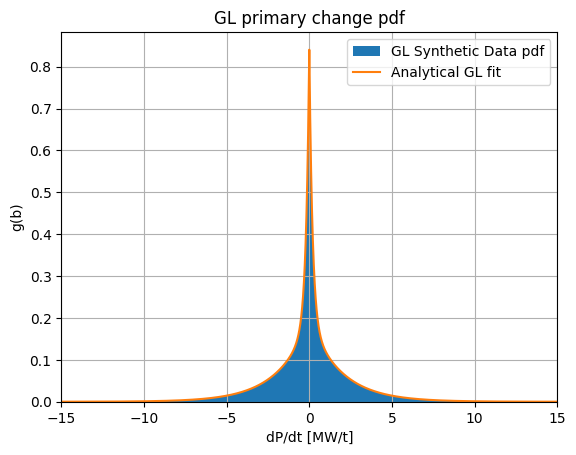

In [5]:
# --- GENERALIZED LAPLACE TIME SERIES ---
c = 0.25
c2 = 1.0 - c
zeta = 10
beta_gl = beta * np.sqrt(c/(zeta**2) + c2)
b = zeta * beta_gl
R_max = np.nan   # no ramp cap

rng = np.random.default_rng(7)
bernoulli_exp = rng.random(N)  
seeds = rng.random(N)          
Y_GL, P_GL = simulate_Y_P_GL(N, Pmax, 77, c, b, c2, beta_gl, R_max, bernoulli_exp, seeds)


n = 10000
fig, axes = plt.subplots(1, 2, figsize=(12, 4), dpi=120)
ax = axes[0]

ax.plot(P_GL[:n], color="tab:blue", lw=2)
ax.set_title("Synthetic Power Series (GL)", fontsize=12, fontweight="bold")
ax.set_xlabel("Time", fontsize=11)
ax.set_ylabel("P [MW]", fontsize=11)

ax.grid(True, ls="--", alpha=0.4)
ax.tick_params(labelsize=10)
ax = axes[1]

ax.plot(Y_GL[:n], color="tab:red", lw=2)
ax.axhline(y=-a, linestyle="--", label="Tolerable slope a")
ax.set_title("Primary Power changes (GL)", fontsize=12, fontweight="bold")
ax.set_xlabel("Time", fontsize=11)
ax.set_ylabel("dP/dt [MW/t]", fontsize=11)

ax.grid(True, ls="--", alpha=0.4)
ax.tick_params(labelsize=10)
ax.legend()


# --- Simple Laplace analytical pdf ---
y_grid = np.linspace(-15, 15, 10000)
fY_GL = c * 0.5 * b * np.exp(-b * np.abs(y_grid)) + c2 * 0.5 * beta_gl * np.exp(-beta_gl * np.abs(y_grid))

plt.figure()
plt.hist(Y_GL, bins=1000, density=True, label="GL Synthetic Data pdf")
plt.plot(y_grid, fY_GL, label="Analytical GL fit")
plt.title("GL primary change pdf")
plt.xlabel("dP/dt [MW/t]")
plt.ylabel("g(b)")
plt.xlim([-15, 15])
plt.legend()
plt.grid(True)
plt.show()

### SL vs GL primary power change distributions

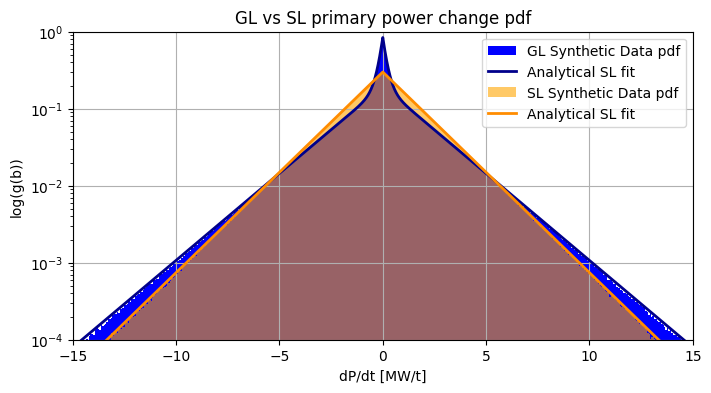

In [9]:
plt.figure(figsize=[8,4])
plt.hist(Y_GL, bins=1000, density=True, color="blue", label="GL Synthetic Data pdf")
plt.plot(y_grid, fY_GL, color="darkblue", linewidth=2, label="Analytical SL fit")

plt.hist(Y_SL, bins=1000, color="orange", alpha=0.6, density=True, label="SL Synthetic Data pdf")
plt.plot(y_grid, fY_SL, color="darkorange", linewidth=2, label="Analytical SL fit")

plt.title("GL vs SL primary power change pdf")
plt.xlabel("dP/dt [MW/t]")
plt.ylabel("log(g(b))")
plt.xlim([-15, 15])
plt.ylim([1e-4, 1])
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.show()